# Building a handwritten digit recognition system using MNIST dataset

---




## Problem


Handwritten digit recognition is a common problem in a field of Optical Character Recognition `(OCR)`, and it has many practical applications, such as digitizing documents, automating data entry, or processing handwritten forms, such as invoices or surveys. In this project, we will develop a system that can recognize handwritten digits from images or digits written on a screen by using machine learning technology. This system can be extended to perform some basic calculations based on the recognized digits.
The aim of this project are:
- Build a system that can accurately recognize handwritten digits `(0–9)` from input images.
- Convert handwritten input into machine-readable format and perform basic calculations on them such as: addition, subtraction, multiplication and division.

---

## Some main tasks:
- `Data colection`: In this project, you use the MNIST dataset, which consists of 60,000 training images and 10,000 testing images of handwritten digits. Each image is 28x28 pixels and labeled with the correct digit.
- `Image Preprocessing`: Normalize the image data (e.g., convert pixel values to a scale from 0 to 1), resize all images to the same dimensions, and apply noise reduction to improve recognition accuracy.
- `Model Development`: We will study how to build and train a model using an advanced technique that separates different classes of digits in machine learning which is `Support Vector Machine (SVM)` algorithm.
- `Evaluation`: Test the model’s performance using the test dataset and assess its accuracy using metrics like accuracy, precision, recall, and F1 score.
- `Application`: Implement a user interface where users can upload or draw digits on screen, and the system will return the predicted digit based on the trained model. Your system should also be able to work with basic calculations.

# 📚 | Importing libraries

In [1]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Processing data
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
from model.SVM import SVC

# Load datasets
from tensorflow.keras import datasets

# library for data evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import cv2

# 📖 | Meta Data
`MNIST dataset`: This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the [MNIST homepage](https://yann.lecun.com/exdb/mnist).

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Check the shape of the dataset
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# Load data digit draw
df_digit_draw = pd.read_csv("./dataset/digit_dataset.csv")
df_digit_draw.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Load data symbols
df_symboils = pd.read_csv('./dataset/symbols_new.csv')
df_symboils.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0.003922,0.000000,0.007843,0.000000,0.003922,0.000000,0.0,0.003922,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*
1,0.000000,0.007843,0.000000,0.000000,0.007843,0.000000,0.0,0.003922,0.007843,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*
2,0.000000,0.003922,0.000000,0.007843,0.000000,0.007843,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*
3,0.000000,0.000000,0.003922,0.003922,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*


# 📊 | Data preprocessing

In [8]:
# Drop the label column from the training dataset
X_train_draw = df_digit_draw.drop("label", axis = 1)
X_train_draw.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Set the label column as the target variable
y_train_draw = df_digit_draw["label"]
y_train_draw.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [10]:
# Change type data to float32 and normalize the data
X_train_draw_flatten = X_train_draw.astype('float32') / 255

# flatten the data X to numpy array
X_train_draw_flatten = X_train_draw_flatten.to_numpy()

# reshape the data to 2D array
X_train_draw_resize = X_train_draw_flatten.reshape(-1, 28 * 28)
print(X_train_draw_resize.shape)

# Change the data numpy array to pandas dataframe
X_train_draw_resize = pd.DataFrame(X_train_draw_resize)
print(X_train_draw_resize.head())

(1000, 784)
   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   778  779  780  781  782  783  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]


In [11]:
# Concat the data X and y
df_digit_draw = pd.concat([X_train_draw_resize, y_train_draw], axis = 1)
df_digit_draw.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
# Change the data type to float32 and normalize the data
X_train_flatten = X_train.astype('float32') / 255
X_test_flatten = X_test.astype('float32') / 255

In [13]:
# reshape the data to 2D array
X_train_resize = X_train_flatten.reshape(-1, 28 * 28)
X_test_resize = X_test_flatten.reshape(-1, 28 * 28)

print(X_train_resize.shape, X_test_resize.shape)

(60000, 784) (10000, 784)


In [14]:
# Change the data numpy array to pandas dataframe
df_X_train = pd.DataFrame(X_train_resize)
df_X_test = pd.DataFrame(X_test_resize)
df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)

df_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# rename the columns target of the data
df_y_train = df_y_train.rename(columns = {0: 'label'})

In [16]:
# concat the data X and y
df_digit = pd.concat([df_X_train, df_y_train], axis = 1)
df_digit.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [17]:
# rename the columns pixel of the data digit draw
new_column_names = ['pixel' + str(i) for i in range(784)] + ['label']
df_digit_draw.columns = new_column_names
df_digit_draw.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
# rename the columns pixel of the data digit
df_digit.columns = new_column_names
df_digit.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


## 📊 | Processing Data Symbols

In [19]:
# Check the shape of the dataset
df_symboils.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5278 entries, 0 to 5277
Columns: 785 entries, pixel_0 to label
dtypes: float64(784), object(1)
memory usage: 31.6+ MB


In [20]:
# Set the label columns
df_symboils.columns = new_column_names
df_symboils.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.003922,0.000000,0.007843,0.000000,0.003922,0.000000,0.0,0.003922,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*
1,0.000000,0.007843,0.000000,0.000000,0.007843,0.000000,0.0,0.003922,0.007843,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*
2,0.000000,0.003922,0.000000,0.007843,0.000000,0.007843,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*
3,0.000000,0.000000,0.003922,0.003922,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*


In [21]:
# Concat the data digit and symbols
df_digit_concat = pd.concat([df_digit_draw, df_digit])
# Reset the index of the
df_digit_concat = df_digit_concat.reset_index(drop = True)

df_digit_concat.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
60995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
60996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
60997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
60998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
60999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [22]:
# Concat the data digit and symbols and reset the index
df_concat = pd.concat([df_digit_concat, df_symboils])
df_concat = df_concat.reset_index(drop = True)

df_concat.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
66273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
66274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
66275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
66276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
66277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-


In [23]:
# Assuming that the label for the symbols are as follows:
label_mapping = {'+': 10, '-': 11, '*': 12, '/': 13}

# Replace label in the 'label' column using the mapping
df_concat['label'] = df_concat['label'].replace(label_mapping)

# Now your Dataframe has labels 10, 11, 12, 13 for +, -, *, / respectively
df_concat.tail()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17832\2649524846.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_concat['label'] = df_concat['label'].replace(label_mapping)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
66273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
66274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
66275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
66276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
66277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11


In [24]:
# Check the shape of the dataset
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66278 entries, 0 to 66277
Columns: 785 entries, pixel0 to label
dtypes: float64(784), int64(1)
memory usage: 396.9 MB


In [25]:
# Drop the label column from the training dataset and set the label column as the target variable
X = df_concat.drop(columns = 'label')
y = df_concat['label']

X.shape, y.shape

((66278, 784), (66278,))

# 🪄 | Data visualization

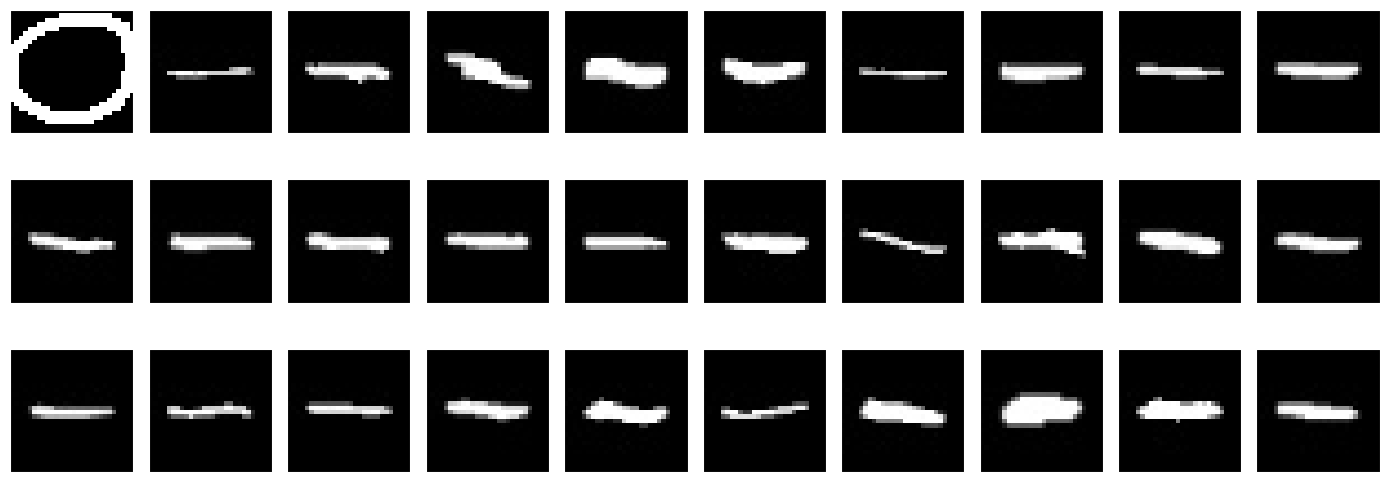

In [30]:
# Visualizing the digits and symbols
plt.figure(figsize = (14, 12))
# Show the first 30 digits
for digit_image in range(0, 30):
    plt.subplot(7, 10, digit_image + 1)
    grid_data = X.iloc[-digit_image].values.reshape(28, 28)
    plt.imshow(grid_data, interpolation = 'None', cmap = 'gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17832\3430631357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y, palette = 'Set1')


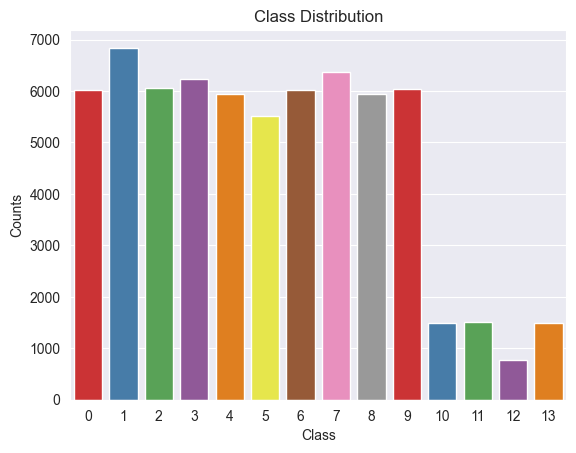

In [31]:
# Visualizing the number of class and counts in the datasets
def class_distribution(y):
    sns.countplot(x = y, palette = 'Set1')
    plt.xlabel('Class')
    plt.ylabel('Counts')
    plt.title('Class Distribution')
    plt.show()


class_distribution(y)

# ☣ | Building model SVM

In [32]:
# Imbalancing the dataset
ramdom = RandomUnderSampler(random_state = 42)
X_random, y_random = ramdom.fit_resample(X, y)

# check the shape of the dataset imbalancing
print(y_random.value_counts())

label
0     776
1     776
2     776
3     776
4     776
5     776
6     776
7     776
8     776
9     776
10    776
11    776
12    776
13    776
Name: count, dtype: int64


In [33]:
# Imblearn dataset
smote = SMOTE(random_state = 42)
X_smote, y_smote = smote.fit_resample(X, y)

# check the shape of the dataset imbalancing
print(y_smote.value_counts())

label
0     6842
1     6842
2     6842
3     6842
4     6842
5     6842
6     6842
7     6842
8     6842
9     6842
12    6842
13    6842
10    6842
11    6842
Name: count, dtype: int64


In [34]:
#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

# Print the shape of the data
print(f'X_train = {X_train.shape}, y_train = {y_train.shape}, X_test = {X_test.shape}, y_test = {y_test.shape}')

X_train = (76630, 784), y_train = (76630,), X_test = (19158, 784), y_test = (19158,)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17832\3430631357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y, palette = 'Set1')


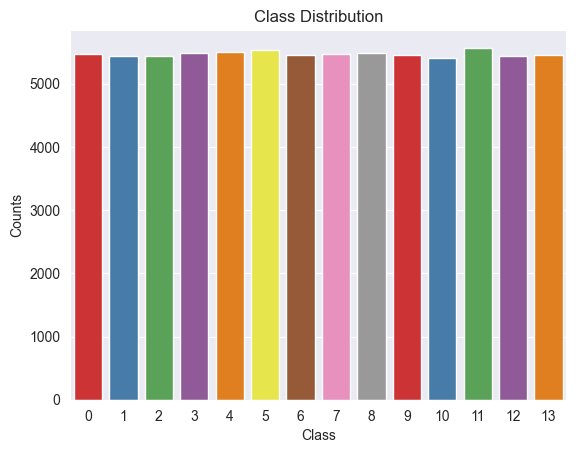

In [35]:
# Visualizing the number of class and counts in the datasets
class_distribution(y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17832\3430631357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y, palette = 'Set1')


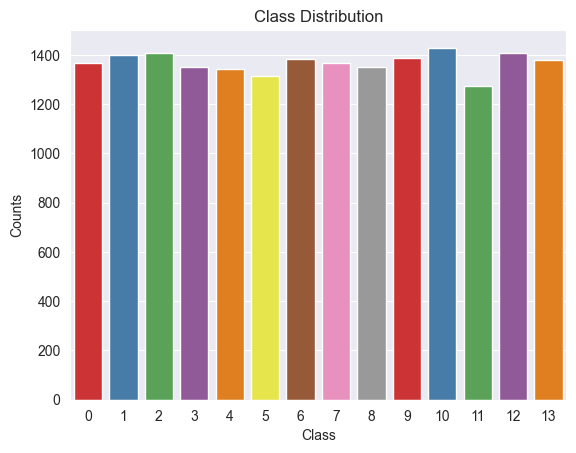

In [36]:
# Visualizing the number of class and counts in the datasets
class_distribution(y_test)

In [37]:
# Convert the data into numpy arrays
X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

# Print the shape of the data
X_train_array[:5], y_train_array[:5]

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00347598, 0.00436715, 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([ 3,  9, 10,  0, 12], dtype=int64))

In [38]:
# Create the model
# The model is created with the following hyperparameters:
# Learning rate = 0.001
# Number of iterations = 100
# Lambda parameter = 0.0001
# The model is trained on the training data
# Time training model 10m 38s
svc = SVC(learning_rate = 0.001, no_of_iterations = 100, lambda_parameter = 0.0001)

# Fit the model
svc.fit(X_train_array, y_train_array)

In [40]:
# Predict the model
y_predict = svc.predict(X_test_array)

# Print the predicted values
print(f'Predict values: {y_predict[:10]}')

# Print the actual values
print(f'Actual values: {y_test_array[:10]}')

Predict values: [10  2  9  4  9  3  5  6  7  8]
Actual values: [10  2  9  4  4  3  5  3  7  8]


# 📊 | Model evaluation

In [41]:
# Calculate the accuracy of the model
test_accuracy = accuracy_score(y_test_array, y_predict)
print(f'Test Accuracy: {test_accuracy * 100:.3f}%')

Test Accuracy: 90.907%


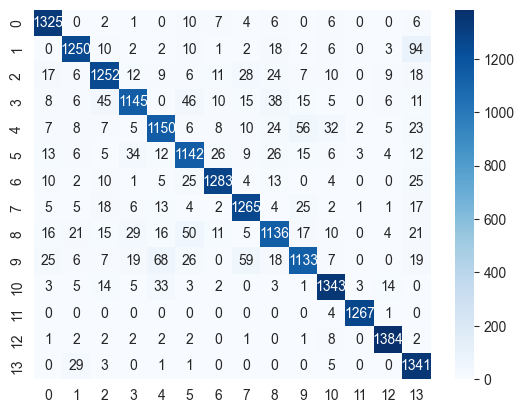

In [45]:
# Confusion matrix
confusion = confusion_matrix(y_test_array, y_predict)

# Plot the confusion matrix
sns.heatmap(confusion, annot = True, fmt = 'd', cmap = 'Blues')
plt.show()

In [46]:
# Classification report
class_wine = classification_report(y_test_array, y_predict)
print(class_wine)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1367
           1       0.93      0.89      0.91      1400
           2       0.90      0.89      0.89      1409
           3       0.91      0.85      0.88      1350
           4       0.88      0.86      0.87      1343
           5       0.86      0.87      0.86      1313
           6       0.94      0.93      0.94      1382
           7       0.90      0.92      0.91      1368
           8       0.87      0.84      0.85      1351
           9       0.89      0.82      0.85      1387
          10       0.93      0.94      0.93      1429
          11       0.99      1.00      0.99      1272
          12       0.97      0.98      0.98      1407
          13       0.84      0.97      0.90      1380

    accuracy                           0.91     19158
   macro avg       0.91      0.91      0.91     19158
weighted avg       0.91      0.91      0.91     19158



# 📸 | Predicting the image

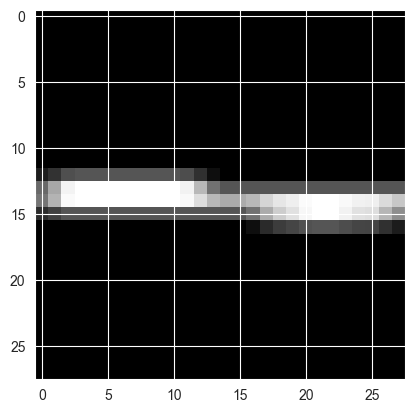

[11]


In [48]:
image = cv2.imread('D:\Graduation_Project\dataset\symbols_test\minus-0001.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

resize_image = cv2.resize(blurred_image, (28, 28))

plt.imshow(resize_image, cmap = 'gray')
plt.show()

flatten_image = resize_image.astype('float32') / 255
flatten_image = flatten_image.reshape(1, -1)

prediction = svc.predict(flatten_image)
print(prediction)

# 💾 | Save the model

In [49]:
joblib.dump(svc, r"D:\Graduation_Project\model\svm_digit_classifier_version5.pkl")

['D:\\Graduation_Project\\model\\svm_digit_classifier_version5.pkl']